In [1]:
import pandas as pd
import numpy as np
from os import path

# plots
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
%matplotlib inline

import calendar
from datetime import datetime


from wordcloud import WordCloud,STOPWORDS

In [2]:
dfTweets = pd.read_csv('../data/train.csv')


In [3]:
dfTweets

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [4]:
dfTweets.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


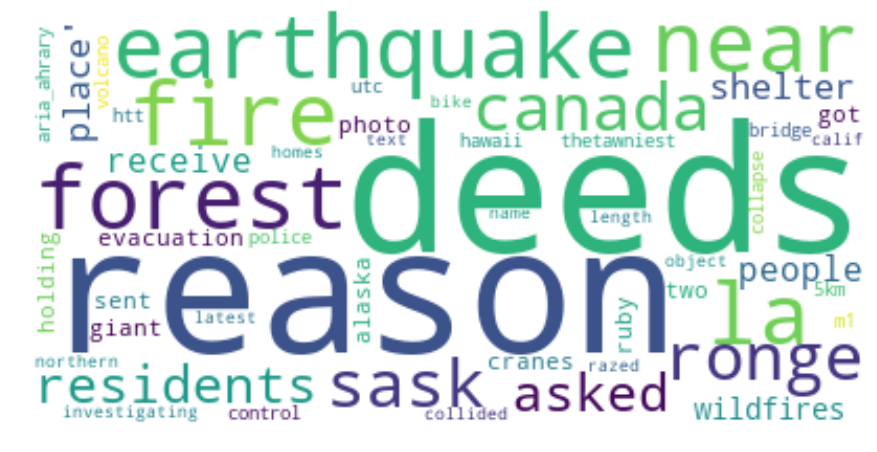

In [5]:
text = str(dfTweets['text']) 
text = text.lower()


stopwords = set(STOPWORDS)
stopwords.add("http")
stopwords.add("dtype")
stopwords.add("int")

#.add("ntilde").add("acute").add("atr").add("object") \
#       .add("id", "").add("dtype").add("length").add("name").add("diva") \
#       .add("nla").add("de").add("en").add("un")
wordcloud = WordCloud(background_color="white",contour_color='steelblue', stopwords=stopwords).generate(text)
plt.figure(figsize=(15,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [6]:
dfTweets[dfTweets['text'].str.contains('LA')]

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0
43,63,ablaze,NaN,SOOOO PUMPED FOR ABLAZE ???? @southridgelife,0
56,80,ablaze,South Africa,TRUCK ABLAZE : R21. VOORTREKKER AVE. OUTSIDE O...,1
77,112,accident,"San Mateo County, CA",Traffic accident N CABRILLO HWY/MAGELLAN AV MI...,1
...,...,...,...,...,...
7337,10503,wildfire,"Riverside, California.",Is LA at Risk for a Giant Wildfire? - Which Wa...,1
7477,10695,wreck,"Somerset, UK",LARGE SHIP WRECK FISH TANK ORNAMENT FOR SALE L...,0
7501,10730,wreck,NaN,@TitorTau The Loretta Lynch one was fuckin' HI...,0
7513,10746,wreckage,NaN,KUALA LUMPUR (Reuters) - A piece of a wing tha...,1


In [7]:
dfTweets['target_description'] = dfTweets['target'].replace(1, 'real disaster').replace(0, 'not real disaster')
dfTweets['long'] = dfTweets['text'].apply(len)

In [8]:
dfTweets.describe()

,id,target,long
count,7613.000000,7613.00000,7613.000000
mean,5441.934848,0.42966,101.037436
std,3137.116090,0.49506,33.781325
min,1.000000,0.00000,7.000000
25%,2734.000000,0.00000,78.000000
50%,5408.000000,0.00000,107.000000
75%,8146.000000,1.00000,133.000000
max,10873.000000,1.00000,157.000000


In [9]:
dfTweets

,id,keyword,location,text,target,long
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,137


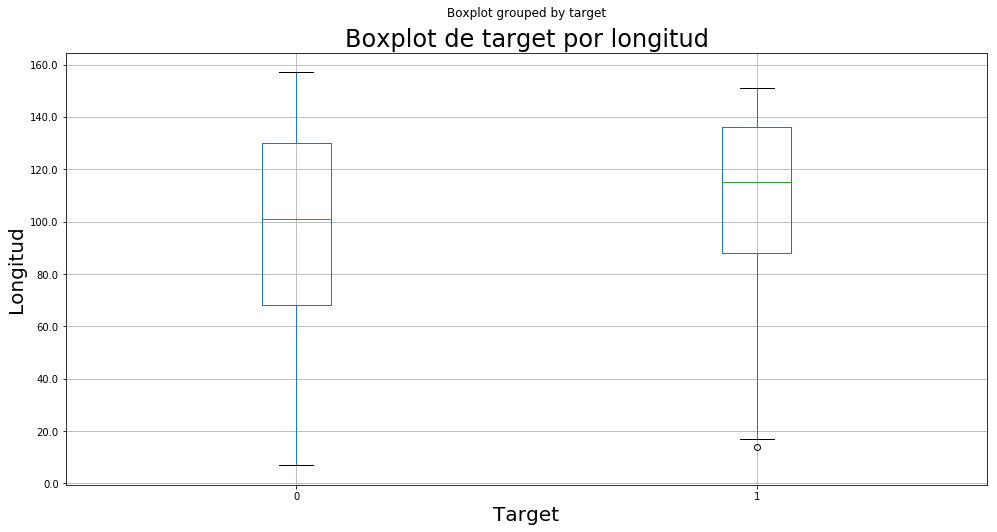

In [11]:

ax = dfTweets.boxplot('long',by='target',figsize=(16,8),rot=0)
type(ax)  
plt.title('Boxplot de target por longitud', fontsize=24);
plt.xlabel('Target', fontsize=20);
plt.ylabel('Longitud', fontsize=20);
# formatear el eje y
vals = ax.get_yticks()
ax.set_yticklabels(['{:.10}'.format(x) for x in vals])
plt.show()

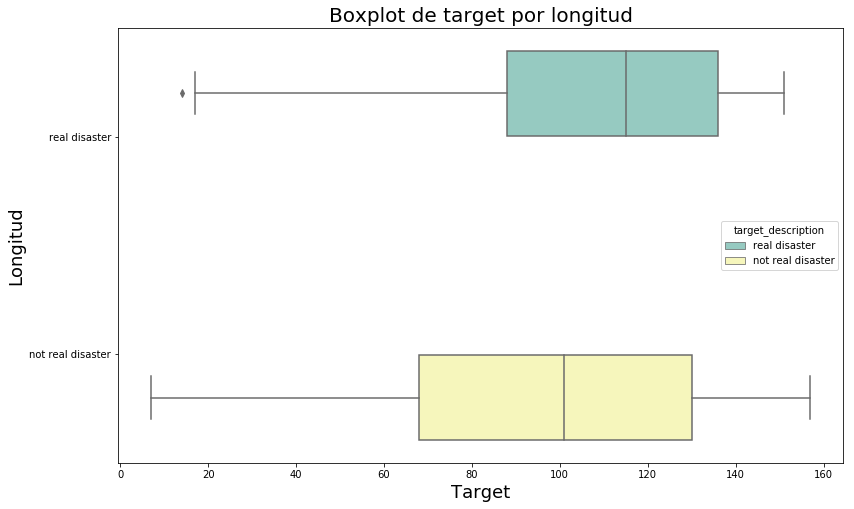

In [29]:
plt.figure(figsize=(13,8))

plt.title('Boxplot de target por longitud', fontsize=20);

ax = sns.boxplot(x="long", y="target_description", hue="target_description", 
                 data=dfTweets, palette="Set3" , orient="h")

plt.xlabel('Target', fontsize=18);
plt.ylabel('Longitud', fontsize=18);
plt.show()

Se observa que los tweets sobre desastres reales tienen mayor longitud 

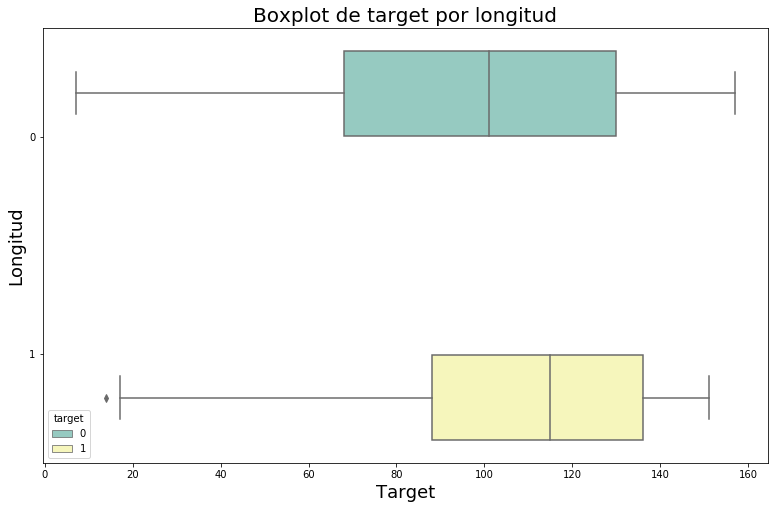

In [28]:
plt.figure(figsize=(13,8))

plt.title('Boxplot de target por longitud', fontsize=20);

ax = sns.boxplot(x="long", y="target", hue="target", 
                 data=dfTweets, palette="Set3" , orient="h")

plt.xlabel('Target', fontsize=18);
plt.ylabel('Longitud', fontsize=18);
plt.show()

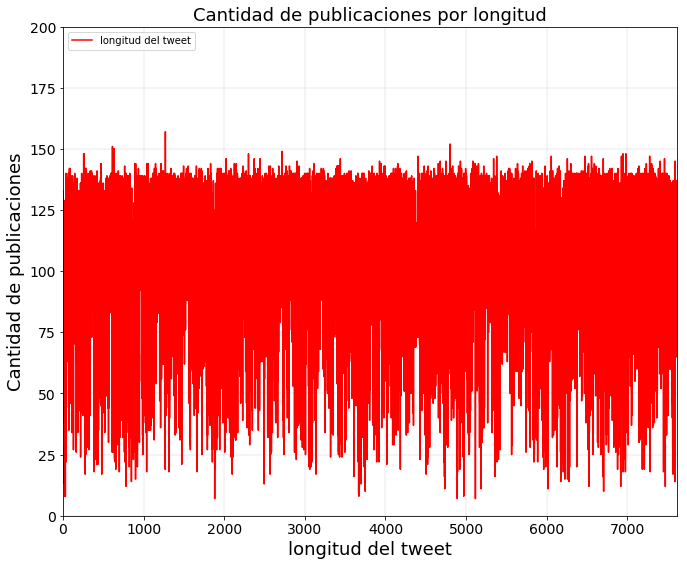

In [38]:
dfTweets.loc[:,'long'].plot(rot=0,figsize=(11,9),color='Red', fontsize=14,x_compat=True, ylim=(0, 200))
plt.grid(color='grey', linestyle='-', linewidth=0.2, alpha=0.8)
plt.title('Cantidad de publicaciones por longitud',fontsize=18);
plt.ylabel('Cantidad de publicaciones',fontsize=18);
plt.xlabel('longitud del tweet',fontsize=18);
plt.legend(['longitud del tweet'], loc='upper left');

plt.show()

In [33]:
dfTweets.loc[:,'long']

0        69
1        38
2       133
3        65
4        88
       ... 
7608     83
7609    125
7610     65
7611    137
7612     94
Name: long, Length: 7613, dtype: int64